Лабораторная работа №3

Ипатов Вадим 2371

Ссылка на датасет: https://www.kaggle.com/datasets/shivam2503/diamonds

In [64]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

In [4]:
df = pd.read_csv('/Users/vadimipatov/Desktop/Машинка2/ML_Lab3_Vadim/diamonds.csv')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


В роли целевого класса возьмем атрибут price, но для этого его нужно преобразовать в категориальную переменную, например, разбив цены на группы. Сразу разделим их на примерно равные группы:

Низкие (Low)

Средние (Medium)

Высокие (High)

In [12]:
df['price_category'] = pd.qcut(df['price'], q=3, labels=['0', '1', '2'])


Также заменим все остальные атрибуты на числовые

class_col = 'cut'
category_cols = ['color', 'clarity']
dict_ = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
dict_2 = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
dict_3 = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
df[class_col] = df[class_col].replace(dict_)
df[category_cols[0]] = df[category_cols[0]].replace(dict_2)
df[category_cols[1]] = df[category_cols[1]].replace(dict_3)

In [14]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,price_category
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,0
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,0
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,0
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,0
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,0


1. Необходимо оценить и сравнить результаты классификации, используя следующие
алгоритмы классификации:
* kNN
* дерево решений

Разделим данные на тестовые и тренировочные 

In [19]:
X = df.drop(columns=['price', 'price_category', 'Unnamed: 0'])
y = df['price_category']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Обучим модели

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Получим предсказания

In [40]:
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)

2. Сравните полученные результаты с помощью различных метрик оценки качества:
* 2.1 Accuracy, Presicion, Recall, F-measure
* 2.2 ROC

In [63]:
print("kNN:")
print(classification_report(y_test, y_pred_knn))
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

kNN:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5440
           1       0.90      0.86      0.88      5465
           2       0.91      0.94      0.93      5277

    accuracy                           0.92     16182
   macro avg       0.92      0.92      0.92     16182
weighted avg       0.92      0.92      0.92     16182

Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5440
           1       0.92      0.91      0.91      5465
           2       0.93      0.95      0.94      5277

    accuracy                           0.94     16182
   macro avg       0.94      0.94      0.94     16182
weighted avg       0.94      0.94      0.94     16182



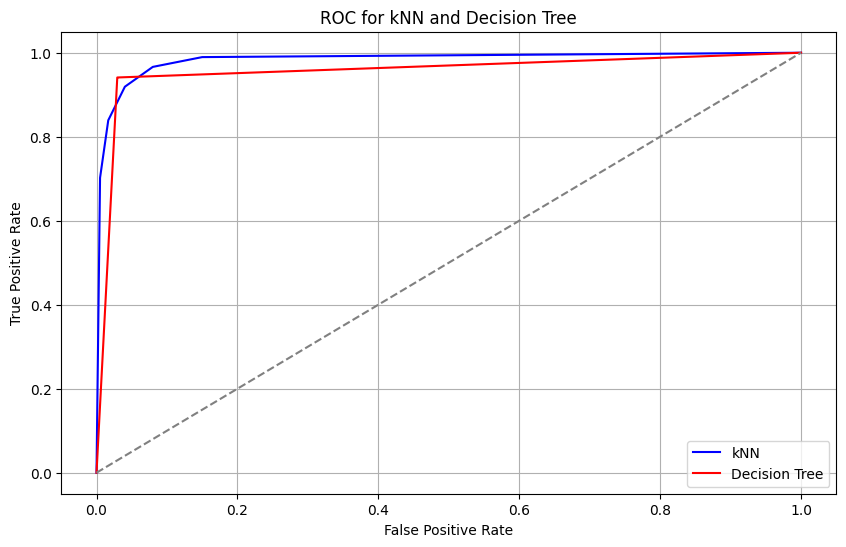

ROC AUC (kNN): 0.9817973779772782
ROC AUC (Decision Tree): 0.9558407366304831


In [65]:
y_proba_knn = knn.predict_proba(X_test)
y_proba_dt = dt.predict_proba(X_test)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

fpr_knn, tpr_knn, _ = roc_curve(y_test_bin.ravel(), y_proba_knn.ravel())
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin.ravel(), y_proba_dt.ravel())

plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label='kNN', color='blue')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC for kNN and Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
roc_knn = roc_auc_score(y_test, y_proba_knn, multi_class='ovr')
roc_dt = roc_auc_score(y_test, y_proba_dt, multi_class='ovr')
print(f'ROC AUC (kNN): {roc_knn}')
print(f'ROC AUC (Decision Tree): {roc_dt}')

**Вывод:**

Мы изучили kNN и Decision Tree алгоритмы классификации и использовали различные метрики оценки качества, чтобы сравнить результаты.

Accuracy показал, что дерево решений(0,94) показало более точный результат, чем knn(0,92)

Precision показал, что дерево решений лучше определяет все виды кристаллов, но knn также неплохо это делает, ведь разница у них в 2 десятые по всем видам цен

Recall лучше друх метрик определил дорогие кристаллы для обоих алгоритмов, но при этом чуть хуже справился со средними. И дерево решений опять предсказывает лучше

F-measure также чуть лучше определяет цену кристаллов

ROC График показал, что knn имеет большую площадь под графиком чем дерево решений, что говорит нам о том, что в этой метрике knn справился лучше, чем в остальных.

Оба алгоритма классификации хорошо справились с определением цены кристаллов, но мы можем сказать, что Decision Tree все-таки справился лучше, потому что по всем метрикам он лидирует, кроме ROC, где очень хорошо справился knn, показав резуль